<a href="https://colab.research.google.com/github/abdulom4/Astronomy/blob/main/Transit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np # imports numpy
import matplotlib.pyplot as plt # imports matplotlib
import astropy.units as u # imports units
import astropy.constants as c # imports constants


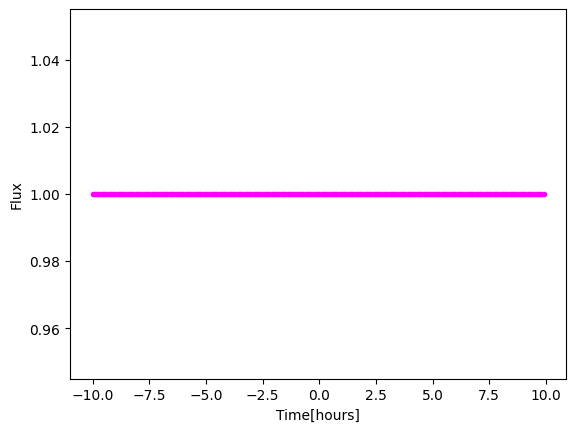

In [121]:
time_arr = np.arange(-10, 10, 0.1) * u.hour # defines time_arr and puts it in a range from -10 to 10 with a step of 0.1
flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # defines flux_arr and puts it in a range from -10 to 10 with a step of 0.1
plt.plot(time_arr, flux_arr, linestyle="-", marker=".", color="magenta") # plots the time_arr and flux_arr
plt.xlabel("Time[hours]") # sets the x label to Time[hours]
plt.ylabel("Flux") # sets the y label to Flux
plt.show() # shows the plot


In [122]:
tau = 2.0 * u.hour # it is the duration of the transit
t_0 = 1.0 * u.hour # it is the time of the transit
time_start = t_0 - tau / 2 # it is the time of the transit minus the duration of the transit divided by 2
time_end = t_0 + tau / 2 # it is the time of the transit plus the duration of the transit divided by 2
print(time_start, time_end) # it prints the time_start and time_end

0.0 h 2.0 h


In [123]:
for i in range(len(time_arr)): # for loop to iterate through the time_arr
  if i < 10: # if loop for the first 10 values of the time_arr
    print("index =", i, "value = ", time_arr[i]) # prints the index and value of the time_arr


index = 0 value =  -10.0 h
index = 1 value =  -9.9 h
index = 2 value =  -9.8 h
index = 3 value =  -9.700000000000001 h
index = 4 value =  -9.600000000000001 h
index = 5 value =  -9.500000000000002 h
index = 6 value =  -9.400000000000002 h
index = 7 value =  -9.300000000000002 h
index = 8 value =  -9.200000000000003 h
index = 9 value =  -9.100000000000003 h


In [124]:
ind = np.where((time_arr >= time_start) & (time_arr <= time_end)) # it is the index of the time_arr where the time_arr is between the time_start and time_end
print(time_arr[ind]) # it prints the time_arr where the time_arr is between the time_start and time_end


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ] h


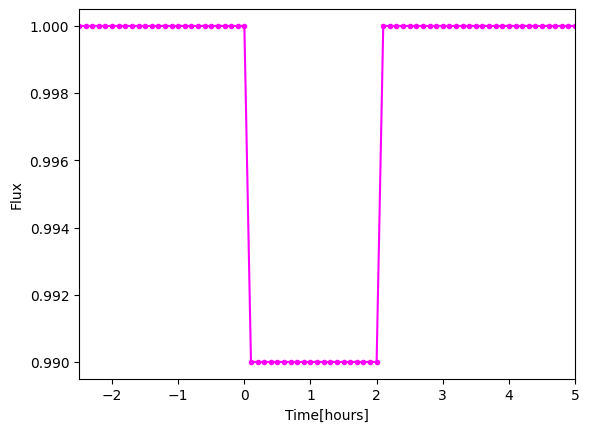

In [125]:
delta = 0.01 # it is the delta value
flux_arr[ind] = 1.0 - delta # it is the flux_arr where the time_arr is between the time_start and time_end
plt.plot(time_arr, flux_arr, linestyle="-", marker=".", color="magenta") # plots the time_arr and flux_arr
plt.xlabel("Time[hours]") # sets the x label to Time[hours]
plt.ylabel("Flux") # sets the y label to Flux
plt.xlim(-2.5,5.0) # sets the x limit to -2.5 and 5.0
plt.show() # shows the plot

In [126]:
def generate_transit_lightcurve(time_arr, t_0, tau, delta): # it is the function to generate the transit lightcurve
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # This is the flux_arr defined when generating the transit lightcurve
  time_start = t_0 - tau / 2 # This is the time_start defined when generating the transit lightcurve
  time_end = t_0 + tau / 2 # This is the time_end defined when generating the transit lightcurve
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
  flux_arr[ind] = 1.0 - delta # This is the flux_arr defined when generating the transit lightcurve
  return flux_arr # This returns the value of the flux_arr defined when generating the transit lightcurve

In [127]:
time_arr = np.arange(-10, 10, 0.1) * u.hour # This is the time_arr defined when generating the transit lightcurve
tau = 4.0 * u.hour # This is the tau defined when generating the transit lightcurve
t_0 = 2.0 * u.hour # This is the t_0 defined when generating the transit lightcurve
delta = 0.99 # Defines the delta value
flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta) # This is the flux_arr defined when generating the transit lightcurve

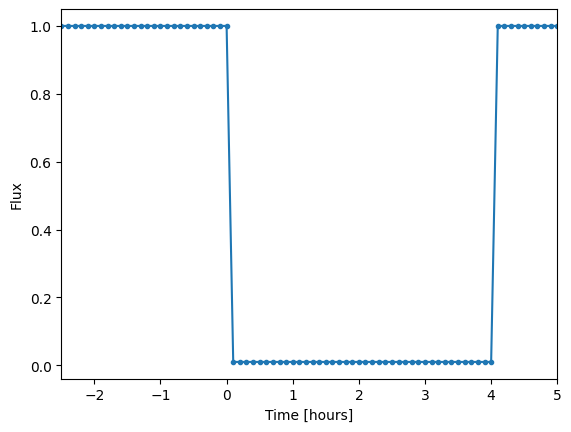

In [128]:
plt.plot(time_arr, flux_arr, linestyle="-", marker=".") # plots the time_arr and flux_arr
plt.xlabel("Time [hours]") # sets the x label to Time [hours]
plt.ylabel("Flux") # sets the y label to Flux
plt.xlim(-2.5, 5.0) # sets the x limit to -2.5 and 5.0
# plt.ylim(0, 0.02)
plt.show() # shows the plot


In [129]:
from google.colab import files # imports files from google.colab
uploaded = files.upload() # uploads the file to google.colab

Saving gj436b.tbl to gj436b (3).tbl


In [130]:
import astropy.io.ascii # imports astropy.io.ascii
dat = astropy.io.ascii.read("gj436b.tbl") # reads the file gj436b.tbl

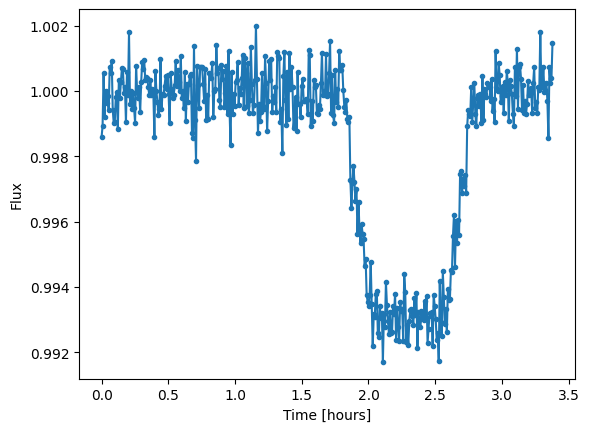

In [131]:
time_obs = dat["HJD"] # This gets the HJD column from the file
time_obs = (time_obs - time_obs[0]) * 24 * u.hour # This defines the time_obs
flux_obs = dat["Relative_Flux"] # This defines the time_obs and flux_obs
plt.plot(time_obs, flux_obs, marker=".") # plots the time_obs and flux_obs
plt.xlabel("Time [hours]") # sets the x label to Time [hours]
plt.ylabel("Flux") # sets the y label to Flux
plt.show() # shows the plot

In [132]:
t_0 = 2.2 * u.hour # This defines the t_0
tau = 1.0 * u.hour # This defines the tau
delta = 0.008 # This defines the delta
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta) # This defines the flux_model

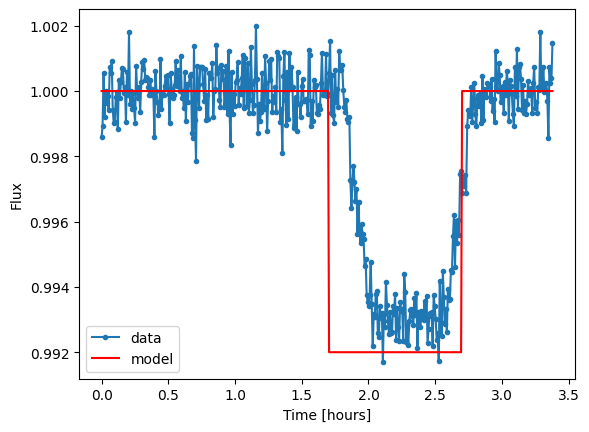

In [133]:
time_obs = dat["HJD"] # This gets the HJD column from the file
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # This defines the time_obs
flux_obs = dat["Relative_Flux"] # This defines the time_obs and flux_obs
plt.plot(time_obs, flux_obs, marker=".", label="data") # plots the time_obs and flux_obs
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # plots the time_obs and flux_model
plt.xlabel("Time [hours]") # sets the x label to Time [hours]
plt.ylabel("Flux") # sets the y label to Flux
plt.legend() # This adds a legend to the plot


plt.show() # shows the plot

In [134]:
dat[0:2]

set,HJD,Relative_Flux
int64,float64,float64
0,2454280.6858131,0.99858714
0,2454280.6861306,0.99893544


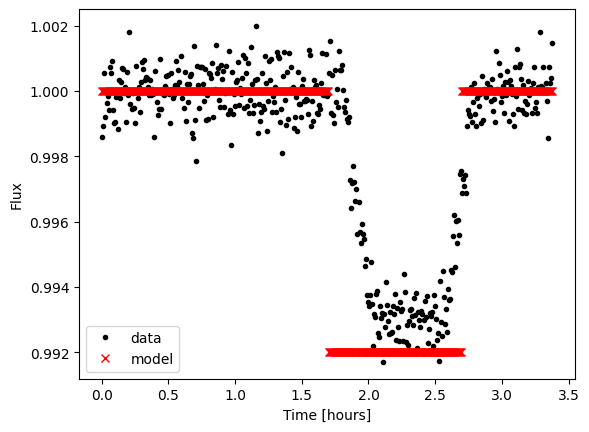

In [135]:
t_0 = 2.2 * u.hour # This defines the t_0
tau = 1.0 * u.hour  # This defines the tau
delta = 0.008  # This defines the delta
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta) # This defines the flux_model
plt.plot(time_obs, flux_obs, marker=".", color="black", linestyle="None", label="data") # plots the time_obs and flux_obs
plt.plot(time_obs, flux_model, marker="x", color="red", linestyle="None", label="model") # plots the time_obs and flux_model
plt.xlabel("Time [hours]") # sets the x label to Time [hours]
plt.ylabel("Flux") # sets the y label to Flux
plt.legend() # This adds a legend to the plot
plt.show() # shows the plot

In [136]:
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind]) # This defines the error

degree_of_freedom = len(time_obs) - 3 # This defines the degree of freedom
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom # This defines the reduced Chi2
print(reduced_Chi2) # This prints the reduced Chi2


9.328644213403495


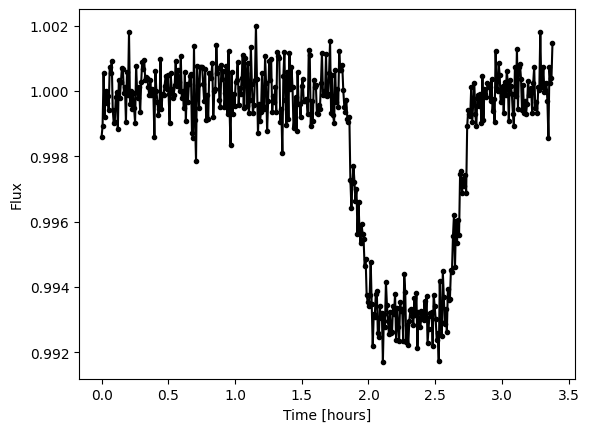

In [137]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")

plt.show()

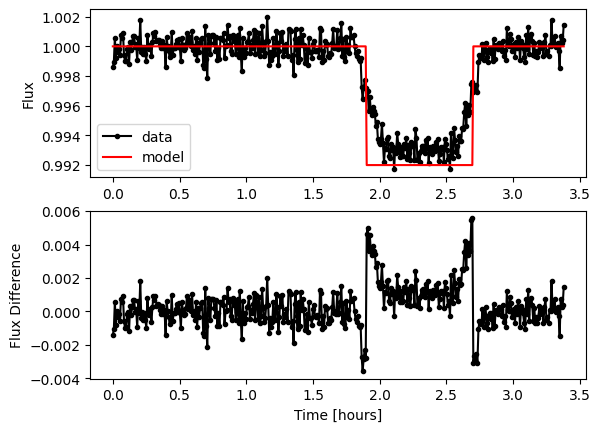

In [138]:
t_0 = 2.3 * u.hour # This defines the t_0
tau = 0.8 * u.hour # This defines the tau
delta = 0.008 # This defines the delta
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta) # This defines the flux_model

plt.subplot(2, 1, 1) # This is the subplot for the first plot

plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # plots the time_obs and flux_obs
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # plots the time_obs and flux_model

plt.ylabel("Flux") # This sets the y label to Flux
plt.legend() # This adds a legend to the plot

plt.subplot(2, 1, 2) # This is the subplot for the second plot

plt.plot(time_obs, flux_obs - flux_model, marker=".", color="black") # This plots the time_obs and flux_obs - flux_model
plt.xlabel("Time [hours]") # This sets the x label to Time [hours]
plt.ylabel("Flux Difference") # This sets the y label to Flux Difference

plt.show() # This shows the plot


In [139]:
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind]) # This defines the error

degree_of_freedom = len(time_obs) - 3 # This defines the degree of freedom
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom # This defines the reduced Chi2
print(reduced_Chi2) # This prints the reduced Chi2

3.0829936013653345
